# Problem Statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

we need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using our understanding of the model, we have to recommend the optimal budget allocation for different marketing levers for the next year.

### 1. Data Understanding

In [608]:
#Importing all the libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [586]:
# Reading consumer data set file and considering '\N' as null value
cs = pd.read_csv('ConsumerElectronics.csv', na_values=['\\N'],low_memory=False)

In [587]:
# checking some records
cs.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,NaN,NaN,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,NaN,NaN,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,NaN,NaN,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,NaN,NaN,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,NaN,NaN,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [588]:
#Checking Basic info and statistics of data frame
print(cs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [589]:
#checking null values
cs.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                      0
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                                  0
pincode                                  0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [590]:
#Checking the null percentage
print(round(100*(cs.isnull().sum()/len(cs.index)),2))

fsn_id                              0.00
order_date                          0.00
Year                                0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
gmv                                 0.00
units                               0.00
deliverybdays                      79.63
deliverycdays                      79.63
s1_fact.order_payment_type          0.00
sla                                 0.00
cust_id                             0.00
pincode                             0.00
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
product_analytic_vertical           0.35
product_mrp                         0.00
product_procurement_sla             0.00
dtype: float64


In [591]:
#since deliverybdays and deliverycdays have more than 75 % of null data. we should discard this column
cs=cs.drop(['deliverybdays','deliverycdays'],axis=1)

In [592]:
# verifying if above two columns have been deleted
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 18 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
product_analytic_category          1648824 non-null object
product_analytic_sub_category      1648824 non-null object
prod

In [593]:
#Checkin unique value in data frame
cs.nunique()

fsn_id                               21219
order_date                         1155192
Year                                     2
Month                                   12
order_id                           1501177
order_item_id                      1480765
gmv                                  12524
units                                   27
s1_fact.order_payment_type               2
sla                                     60
cust_id                            1201090
pincode                               7565
product_analytic_super_category          1
product_analytic_category                5
product_analytic_sub_category           14
product_analytic_vertical               73
product_mrp                           1929
product_procurement_sla                 17
dtype: int64

In [594]:
# data sanity Check : Data should be from july-2015 to June -2016,Let's remove other data from ecom dataset

ecart=cs.loc[(((cs.Year==2015) & (cs.Month >6)) |((cs.Year==2016) & (cs.Month <=6))),:]

In [600]:
#Verifying if filtering is done properly.. we see some reduced records. Initial_count=1648824 current_count=1648215
ecart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648215 entries, 0 to 1648823
Data columns (total 18 columns):
fsn_id                             1648215 non-null object
order_date                         1648215 non-null object
Year                               1648215 non-null int64
Month                              1648215 non-null int64
order_id                           1648215 non-null float64
order_item_id                      1648215 non-null float64
gmv                                1648215 non-null object
units                              1648215 non-null int64
s1_fact.order_payment_type         1648215 non-null object
sla                                1648215 non-null int64
cust_id                            1648215 non-null object
pincode                            1648215 non-null object
product_analytic_super_category    1648215 non-null object
product_analytic_category          1648215 non-null object
product_analytic_sub_category      1648215 non-null object
prod

### Data Preparation
we have to create market mix models for three product subcategories  - camera accessory, home audio and gaming accessory. Also, the models have to be built at a weekly level for each of the sub-categories.

In [596]:
#check unique value in product_analytic_category
ecart.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [597]:
#checking stats of rating dataframe

ecart.product_analytic_sub_category.unique()

# we will be doing our analysis on product_analytic_sub_category as given in the problem statement

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [598]:
# As per problem statement let's select only 3 product subcategories.
eleckart=ecart.loc[(ecart['product_analytic_sub_category']=='CameraAccessory') | 
                      (ecart['product_analytic_sub_category']=='GamingAccessory') | 
                      (ecart['product_analytic_sub_category']=='HomeAudio')]

In [599]:
# checking basic info after selecting only 3 product subcategories
eleckart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566067 entries, 0 to 1647205
Data columns (total 18 columns):
fsn_id                             566067 non-null object
order_date                         566067 non-null object
Year                               566067 non-null int64
Month                              566067 non-null int64
order_id                           566067 non-null float64
order_item_id                      566067 non-null float64
gmv                                566067 non-null object
units                              566067 non-null int64
s1_fact.order_payment_type         566067 non-null object
sla                                566067 non-null int64
cust_id                            566067 non-null object
pincode                            566067 non-null object
product_analytic_super_category    566067 non-null object
product_analytic_category          566067 non-null object
product_analytic_sub_category      566067 non-null object
product_analytic_ver

In [601]:
#Checking the null percentage
print(round(100*(eleckart.isnull().sum()/len(eleckart.index)),2))

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
dtype: float64


In [609]:
# Change order_date to date 
eleckart['order_date'] =  pd.to_datetime(eleckart['order_date'])
eleckart.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42


In [610]:
# Get Week of the year for the each row based on order_date
df=eleckart
df['order_week'] = df['order_date'].dt.week
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42


In [611]:
## Format order_week into continous weeks from 2016 onwards
df['order_week'].loc[(df['order_date'] > '2015-12-31') & (df['order_week'] < 53)] = \
        df['order_week'].loc[(df['order_date'] > '2015-12-31') & (df['order_week'] < 53)]+53
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42


In [612]:
# Checking if product mrp is less than 0.
df.loc[df['product_mrp'] < 0].count()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
order_week                         0
dtype: int64

In [613]:
# MRP cann't be less than or equal to 0. Removing the freebies from the dataset
df = df.loc[df['product_mrp'] > 0]
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42


In [614]:
#dealing null values of gmv which is our target variable and blanks
df['gmv'] = df['gmv'].replace("", np.nan)
df['gmv'] = df['gmv'].replace(" ", np.nan)

In [615]:
# selecting only not null records for gmv.
df = df[pd.notnull(df['gmv'])]

In [617]:
### GMV cann't be 0. If 0 then they are discounted products. Remove these rows
df = df.loc[pd.to_numeric(df['gmv']) != 0]

In [618]:
# Confirm data is free of NaN
round(100*(df.isnull().sum()/len(df.index)),2)

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
order_week                         0.0
dtype: float64

In [619]:
# Convert gmv to numeric
df['gmv'] = pd.to_numeric(df['gmv'])

In [620]:
# Assumption: MRP*units is greater than revenue in some cases. 
# So, it is assumed that products can be sold higher than MRP (may be because of delivery charges)
df.loc[df['product_mrp']* df['units'] < df['gmv']].shape

(14028, 19)

In [621]:
# Calculate sale_price_per_unit
df['sale_price_per_unit'] = df['gmv']/df['units']
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week,sale_price_per_unit
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,6400.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,6900.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,1990.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,1690.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,1618.0


##### Importing Stock Index , NPS, Holiday , Ad stock and Climate data for Feature Engineering.

In [623]:
# Loading nps and stock data
monthly_nps_score = pd.read_excel('Media data and other information.xlsx',header =1, \
                                  sheet_name='Monthly NPS Score',index_col =0)
monthly_nps_score.head()

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


In [624]:
# Transpose the data
monthly_nps_score_transposed = monthly_nps_score.T
monthly_nps_score_transposed.head()

,NPS,Stock Index
July'15,54.599588,1177.0
Aug'15,59.987101,1206.0
Sept'15,46.925419,1101.0
Oct'15,44.398389,1210.0
Nov'15,47.000000,1233.0


In [625]:
# Converting data frame structure and adding columns so that we can merge it with consumer data.
monthly_nps_score_transposed['year_month'] = monthly_nps_score_transposed.index
monthly_nps_score_transposed.head()

,NPS,Stock Index,year_month
July'15,54.599588,1177.0,July'15
Aug'15,59.987101,1206.0,Aug'15
Sept'15,46.925419,1101.0,Sept'15
Oct'15,44.398389,1210.0,Oct'15
Nov'15,47.000000,1233.0,Nov'15


In [626]:
# fetching out Month and Year from year_month column
monthly_nps_score_transposed[['Month','Year']] = monthly_nps_score_transposed.year_month.str.split("\'", expand=True) 
monthly_nps_score_transposed.drop(['year_month'], axis=1, inplace=True)
monthly_nps_score_transposed

,NPS,Stock Index,Month,Year
July'15,54.599588,1177.0,July,15
Aug'15,59.987101,1206.0,Aug,15
Sept'15,46.925419,1101.0,Sept,15
Oct'15,44.398389,1210.0,Oct,15
Nov'15,47.000000,1233.0,Nov,15
Dec'15,45.800000,1038.0,Dec,15
Jan'16,47.093031,1052.0,Jan,16
Feb'16,50.327406,1222.0,Feb,16
Mar'16,49.020550,1015.0,Mar,16
Apr'16,51.827605,1242.0,Apr,16


In [627]:
# Handle Month into proper format
mont_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'July':7, 'Aug':8, 'Sept':9, 'Oct':10, 'Nov':11, \
             'Dec':12 }
monthly_nps_score_transposed.Month = monthly_nps_score_transposed.Month.map(mont_dict)
monthly_nps_score_transposed

,NPS,Stock Index,Month,Year
July'15,54.599588,1177.0,7,15
Aug'15,59.987101,1206.0,8,15
Sept'15,46.925419,1101.0,9,15
Oct'15,44.398389,1210.0,10,15
Nov'15,47.000000,1233.0,11,15
Dec'15,45.800000,1038.0,12,15
Jan'16,47.093031,1052.0,1,16
Feb'16,50.327406,1222.0,2,16
Mar'16,49.020550,1015.0,3,16
Apr'16,51.827605,1242.0,4,16


In [628]:
# Handle Year into proper format
monthly_nps_score_transposed['Year'] = pd.to_numeric('20' + monthly_nps_score_transposed['Year'].astype(str))
monthly_nps_score_transposed

,NPS,Stock Index,Month,Year
July'15,54.599588,1177.0,7,2015
Aug'15,59.987101,1206.0,8,2015
Sept'15,46.925419,1101.0,9,2015
Oct'15,44.398389,1210.0,10,2015
Nov'15,47.000000,1233.0,11,2015
Dec'15,45.800000,1038.0,12,2015
Jan'16,47.093031,1052.0,1,2016
Feb'16,50.327406,1222.0,2,2016
Mar'16,49.020550,1015.0,3,2016
Apr'16,51.827605,1242.0,4,2016


In [629]:
#Merging nps with consumer data
df = pd.merge(df, monthly_nps_score_transposed, how='outer', on=['Month', 'Year'])
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week,sale_price_per_unit,NPS,Stock Index
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,6400.0,44.398389,1210.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,6900.0,44.398389,1210.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,1990.0,44.398389,1210.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,1690.0,44.398389,1210.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,1618.0,44.398389,1210.0


In [630]:
# Import Weather data
ontario_2015 = pd.read_csv("Ontario-2015.csv",skiprows=24)
ontario_2016 = pd.read_csv("Ontario-2016.csv",skiprows=24)
ontario = ontario_2015.append(ontario_2016, ignore_index=True)
ontario.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,...,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,...,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [631]:
#Checking count of records and columns
ontario.shape

(731, 27)

In [632]:
# checking nps data frame for any null values
ontario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 27 columns):
Date/Time                    731 non-null object
Year                         731 non-null int64
Month                        731 non-null int64
Day                          731 non-null int64
Data Quality                 456 non-null object
Max Temp (°C)                442 non-null float64
Max Temp Flag                14 non-null object
Min Temp (°C)                409 non-null float64
Min Temp Flag                47 non-null object
Mean Temp (°C)               409 non-null float64
Mean Temp Flag               47 non-null object
Heat Deg Days (°C)           409 non-null float64
Heat Deg Days Flag           47 non-null object
Cool Deg Days (°C)           409 non-null float64
Cool Deg Days Flag           47 non-null object
Total Rain (mm)              456 non-null float64
Total Rain Flag              10 non-null object
Total Snow (cm)              456 non-null float64
Total Snow Flag

In [633]:
# Above shows there are lots of null. let check number of unique values
ontario.nunique()

Date/Time                    731
Year                           2
Month                         12
Day                           31
Data Quality                   1
Max Temp (°C)                 86
Max Temp Flag                  1
Min Temp (°C)                 81
Min Temp Flag                  1
Mean Temp (°C)               140
Mean Temp Flag                 1
Heat Deg Days (°C)            97
Heat Deg Days Flag             1
Cool Deg Days (°C)            44
Cool Deg Days Flag             1
Total Rain (mm)               81
Total Rain Flag                1
Total Snow (cm)               11
Total Snow Flag                1
Total Precip (mm)             81
Total Precip Flag              1
Snow on Grnd (cm)             21
Snow on Grnd Flag              1
Dir of Max Gust (10s deg)      0
Dir of Max Gust Flag           0
Spd of Max Gust (km/h)         0
Spd of Max Gust Flag           0
dtype: int64

In [634]:
#dropping the colums with no unique values since they dont have any varinace
columns_with_no_unique_value = ['Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag','Total Precip Flag',
                    'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',\
                    'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag']
ontario=ontario.drop(columns_with_no_unique_value,axis=1)
ontario.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0


In [635]:
#Checking Null value percentage
round(100*(ontario.isnull().sum()/len(ontario.index)),2)

Date/Time              0.00
Year                   0.00
Month                  0.00
Day                    0.00
Max Temp (°C)         39.53
Min Temp (°C)         44.05
Mean Temp (°C)        44.05
Heat Deg Days (°C)    44.05
Cool Deg Days (°C)    44.05
Total Rain (mm)       37.62
Total Snow (cm)       37.62
Total Precip (mm)     37.62
Snow on Grnd (cm)     37.62
dtype: float64

In [636]:
# Limit data between July 2015 to June 2016
ontario['Date/Time'] =  pd.to_datetime(ontario['Date/Time'])
ontario = ontario.loc[(ontario['Date/Time'] >= '2015-07-01') & (ontario['Date/Time'] <= '2016-06-30')]
ontario.shape

(366, 13)

In [637]:
# Get week of the year from the Date/Time
ontario['Week'] =ontario['Date/Time'].dt.week
ontario.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
181,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,27
182,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,27
183,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,27
184,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,27
185,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,27


In [638]:
ontario['Week'].loc[(ontario['Date/Time'] > '2015-12-31') & (ontario['Week'] < 53)] = \
        ontario['Week'].loc[(ontario['Date/Time'] > '2015-12-31') & (ontario['Week'] < 53)]+53
ontario.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
181,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,27
182,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,27
183,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,27
184,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,27
185,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,27


In [639]:
#Aggregaitng data weekly
ontario_cols = [\
    'Max Temp (°C)', 'Min Temp (°C)','Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)',\
                'Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)']

In [640]:
ontario = ontario.groupby(['Week'])[ontario_cols].mean()

In [641]:
ontario['order_week'] = pd.to_numeric(ontario.index)
ontario.head()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
Week,,,,,,,,,,
27,25.500000,13.200000,19.360000,0.100000,1.460000,0.000000,0.0,0.000000,0.0,27
28,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,28
29,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,29
30,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0,30
31,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0,31


In [642]:
# Assumption: There are very few missing values. Use bfill to fill next row data into these missing data
ontario = ontario.bfill(axis ='rows') 

In [643]:
# merging it with consumer and nps data
df = pd.merge(df, ontario, how='outer', on=['order_week'])
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,Stock Index,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,...,1210.0,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0
1,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,...,1210.0,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0
2,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,1210.0,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0
3,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,Prepaid,5,...,1210.0,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0
4,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3.418429e+15,3.418429e+15,3695.0,1,Prepaid,6,...,1210.0,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0


In [644]:
df['day_of_month'] = df.order_date.dt.day
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),day_of_month
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,...,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0,17
1,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,...,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0,14
2,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0,17
3,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,Prepaid,5,...,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0,17
4,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3.418429e+15,3.418429e+15,3695.0,1,Prepaid,6,...,17.0,8.75,14.3,4.1,0.4,0.3,0.0,0.3,0.0,16


In [645]:
# Import Media Investment sheet 
# Read media_investments from excel
media_investments = pd.read_excel('Media data and other information.xlsx',header =2, \
                                  sheet_name='Media Investment',usecols=("B:M") )
media_investments.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [646]:
# Assumption: Fill na with 0. Assuming there was no expenditure in that mode 
media_investments = media_investments.fillna(0)
media_investments.head(15)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [647]:
media_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


In [648]:
media_investments_columns = ['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',\
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',\
       'Other']

##### Adstock Creation

In [664]:
# First we will create ad spend on daily basis then we will aggregate it weekly
media_investments['date'] = media_investments['Year'].map(str) + '-' + media_investments['Month'].map(str)

In [665]:
media_investments['date'] = pd.to_datetime(media_investments['date'], format='%Y-%m')

In [667]:
media_investments.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,date
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0,2015-08-01
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0,2015-09-01
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015-10-01
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0,2015-11-01


In [668]:
start_date = media_investments['date'].min() - pd.DateOffset(day=1)
end_date = media_investments['date'].max() + pd.DateOffset(day=31)

In [669]:
media_investments_daily = pd.date_range(start_date, end_date, freq='D')
media_investments_daily

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', length=366, freq='D')

In [670]:
media_investments_daily.name = 'daily_date'

In [671]:
media_investments_daily = pd.DataFrame(media_investments_daily)

In [672]:
media_investments_daily['Month'] = media_investments_daily.daily_date.dt.month
media_investments_daily['Year'] = media_investments_daily.daily_date.dt.year
media_investments_daily['day_of_month'] = media_investments_daily.daily_date.dt.day

In [673]:
# Merging Daily media investment with total media investment
media_investments_daily = pd.merge(media_investments_daily, media_investments, how='left', on=['Year','Month'])

In [674]:
media_investments_daily.head()

,daily_date,Month,Year,day_of_month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,date
0,2015-07-01,7,2015,1,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01
1,2015-07-02,7,2015,2,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01
2,2015-07-03,7,2015,3,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01
3,2015-07-04,7,2015,4,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01
4,2015-07-05,7,2015,5,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01


In [675]:
# Drop old date column
media_investments_daily.drop(['date'], axis=1, inplace=True)

In [676]:
# Calulating max day of any given month
media_investments_max_month = media_investments_daily.groupby\
((media_investments_daily.Year, media_investments_daily.Month), sort=False)['day_of_month'].max()


In [677]:
media_investments_max_month= pd.DataFrame(media_investments_max_month)

In [678]:
media_investments_max_month.rename(columns={'day_of_month':'max_day_of_month'}, inplace=True)

In [679]:
media_investments_max_month = media_investments_max_month.reset_index()
media_investments_max_month

,Year,Month,max_day_of_month
0,2015,7,31
1,2015,8,31
2,2015,9,30
3,2015,10,31
4,2015,11,30
5,2015,12,31
6,2016,1,31
7,2016,2,29
8,2016,3,31
9,2016,4,30


In [680]:
# Drop old date column
media_investments_daily.drop(['day_of_month'], axis=1, inplace=True)

In [681]:
media_investments_daily = pd.merge(media_investments_max_month, media_investments_daily, how='left', on=['Year','Month'])
media_investments_daily.head(5)

,Year,Month,max_day_of_month,daily_date,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,31,2015-07-01,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,2015,7,31,2015-07-02,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0
2,2015,7,31,2015-07-03,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0
3,2015,7,31,2015-07-04,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0
4,2015,7,31,2015-07-05,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,0.0,0.0


In [682]:
# Divide every day data by max no of days in the month to get daily data
media_investments_columns = ['Total Investment','TV','Digital','Sponsorship','Content Marketing',\
                         'Online marketing','SEM','Radio',\
                         'Other',' Affiliates']
media_investments_daily[media_investments_columns] = media_investments_daily[media_investments_columns].div(media_investments_daily.max_day_of_month, axis=0)
media_investments_daily.head()

,Year,Month,max_day_of_month,daily_date,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,31,2015-07-01,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
1,2015,7,31,2015-07-02,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
2,2015,7,31,2015-07-03,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
3,2015,7,31,2015-07-04,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
4,2015,7,31,2015-07-05,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0


In [683]:
media_investments_daily['day_of_month'] = media_investments_daily.daily_date.dt.day

In [684]:
# Merging above datafrmae with consumer data
df = pd.merge(df, media_investments_daily, how='left', on=['Year','Month','day_of_month'])
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,...,5.488913,0.198216,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0
1,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,...,5.488913,0.198216,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0
2,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,5.488913,0.198216,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0
3,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,Prepaid,5,...,5.488913,0.198216,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0
4,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3.418429e+15,3.418429e+15,3695.0,1,Prepaid,6,...,5.488913,0.198216,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560712 entries, 0 to 560711
Data columns (total 44 columns):
fsn_id                             560712 non-null object
order_date                         560712 non-null datetime64[ns]
Year                               560712 non-null int64
Month                              560712 non-null int64
order_id                           560712 non-null float64
order_item_id                      560712 non-null float64
gmv                                560712 non-null float64
units                              560712 non-null int64
s1_fact.order_payment_type         560712 non-null object
sla                                560712 non-null int64
cust_id                            560712 non-null object
pincode                            560712 non-null object
product_analytic_super_category    560712 non-null object
product_analytic_category          560712 non-null object
product_analytic_sub_category      560712 non-null object
product_anal

In [687]:
# Creating list of Special Sale Calender to create new column
special_days=['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
            '2015-10-15','2015-10-16','2015-10-17','2015-11-7','2015-11-8','2015-11-9','2015-11-10','2015-11-11',
           '2015-11-12','2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30'
          '2015-12-31','2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01',
          '2016-02-02','2016-02-20','2016-02-21','2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09',
          '2016-05-25','2016-05-26','2016-05-27']

In [688]:
#create special day if its holiday and pay day as well
df['spec_days']= df['order_date'].dt.date.map(lambda x: 1 if ( (str(x) in special_days) | (str(x)[-2:] in [1,15])) else 0)

In [689]:
#checking unique special day
df['spec_days'].unique()

array([1, 0], dtype=int64)

In [690]:
#making cod to 0 and Prepaid to 1
df['s1_fact.order_payment_type'].unique()

array(['COD', 'Prepaid'], dtype=object)

In [691]:
categorical_columns = ['s1_fact.order_payment_type']

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[categorical_columns], drop_first=True)

# Adding the dummy to the master dataframe
df = pd.concat([df, dummy], axis=1)

# We have created dummies for the below variables, so we can drop them
df = df.drop(categorical_columns, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560712 entries, 0 to 560711
Data columns (total 45 columns):
fsn_id                                560712 non-null object
order_date                            560712 non-null datetime64[ns]
Year                                  560712 non-null int64
Month                                 560712 non-null int64
order_id                              560712 non-null float64
order_item_id                         560712 non-null float64
gmv                                   560712 non-null float64
units                                 560712 non-null int64
sla                                   560712 non-null int64
cust_id                               560712 non-null object
pincode                               560712 non-null object
product_analytic_super_category       560712 non-null object
product_analytic_category             560712 non-null object
product_analytic_sub_category         560712 non-null object
product_analytic_vertical   

In [692]:
df.head(10)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,cust_id,...,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,spec_days,s1_fact.order_payment_type_Prepaid
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,-1.01299130778588E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,0
1,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,-7.60496084352714E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,0,1
2,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,2.8945572083453E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1
3,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,-7.64154636189174E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1
4,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3.418429e+15,3.418429e+15,3695.0,1,6,-7.15614041481066E+016,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1
5,ACCCX3S5JGAJETYR,2015-10-15 23:41:39,2015,10,3.417799e+15,3.417799e+15,3695.0,1,5,9.17327596234152E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,0
6,ACCCX3SG2GG9YYAH,2015-10-13 23:08:11,2015,10,4.416128e+15,4.416128e+15,6675.0,1,7,6.25519040763717E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,0,1
7,ACCCX3SG2GG9YYAH,2015-10-14 21:26:55,2015,10,3.416931e+15,3.416931e+15,6750.0,1,2,7.1891021620877E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,0,1
8,ACCCX3SG2GG9YYAH,2015-10-15 16:54:54,2015,10,2.417575e+15,2.417575e+15,6749.0,1,5,-8.89972771300961E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,0
9,ACCCX3SG2GG9YYAH,2015-10-16 12:39:30,2015,10,3.418345e+15,3.418345e+15,6075.0,1,4,-2.51743099459753E+018,...,0.407177,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1


In [693]:
# Feature Creation.. 
#Days were divided on the basis of climate data after analyzing mean, mode etc..
#LOW temperature days which lies in range [-7,5]
#MILD temperature days which lies in range [5,15]
#HIGH temperature days which lies in range [15,25] 
df['Mean Temp (°C)'].describe()

count    560712.000000
mean         11.150929
std           8.469965
min          -7.266667
25%           5.166667
50%          10.900000
75%          19.240000
max          24.566667
Name: Mean Temp (°C), dtype: float64

In [694]:
bins = [-7, 5, 15, 25]
label =['LOW','MILD','HIGH']
df['Temprature_bins'] = pd.cut(df['Mean Temp (°C)'], bins,labels=label)
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,cust_id,...,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,spec_days,s1_fact.order_payment_type_Prepaid,Temprature_bins
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,-1.01299130778588E+018,...,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,0,MILD
1,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,-7.60496084352714E+018,...,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,0,1,MILD
2,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,2.8945572083453E+018,...,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1,MILD
3,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,-7.64154636189174E+018,...,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1,MILD
4,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3.418429e+15,3.418429e+15,3695.0,1,6,-7.15614041481066E+016,...,2.731372,0.111099,0.786186,0.224958,1.029904,0.0,0.0,1,1,MILD


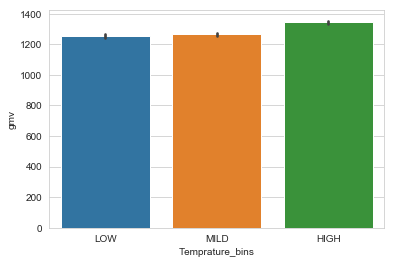

In [695]:
sns.set_style("whitegrid")
sns.barplot(x='Temprature_bins', y='gmv', data=df)
plt.show()

In [696]:
# Drop columns, that cannot be used to collate and create a weekly data.
drop_columns =  ['fsn_id','order_id','order_item_id','cust_id','pincode','product_analytic_super_category',\
                 'product_analytic_category','Temprature_bins']
df=df.drop(drop_columns,axis=1)

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560712 entries, 0 to 560711
Data columns (total 38 columns):
order_date                            560712 non-null datetime64[ns]
Year                                  560712 non-null int64
Month                                 560712 non-null int64
gmv                                   560712 non-null float64
units                                 560712 non-null int64
sla                                   560712 non-null int64
product_analytic_sub_category         560712 non-null object
product_analytic_vertical             560712 non-null object
product_mrp                           560712 non-null int64
product_procurement_sla               560712 non-null int64
order_week                            560712 non-null int64
sale_price_per_unit                   560712 non-null float64
NPS                                   560712 non-null float64
Stock Index                           560712 non-null float64
Max Temp (°C)                 

In [ ]:
#Save this dataframe as csv so that team can work separately
df.to_csv()

#####  Aggregation  of CameraAccessory data weekly basis

In [698]:
## As per problem statement let's select only 3 product subcategories.
# First lets start with CameraAccessory
CameraAccessory=df.loc[(ecart['product_analytic_sub_category']=='CameraAccessory')]
CameraAccessory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74493 entries, 0 to 558998
Data columns (total 38 columns):
order_date                            74493 non-null datetime64[ns]
Year                                  74493 non-null int64
Month                                 74493 non-null int64
gmv                                   74493 non-null float64
units                                 74493 non-null int64
sla                                   74493 non-null int64
product_analytic_sub_category         74493 non-null object
product_analytic_vertical             74493 non-null object
product_mrp                           74493 non-null int64
product_procurement_sla               74493 non-null int64
order_week                            74493 non-null int64
sale_price_per_unit                   74493 non-null float64
NPS                                   74493 non-null float64
Stock Index                           74493 non-null float64
Max Temp (°C)                         74493 n

In [699]:
average_columns = ['Year','Month','day_of_month','max_day_of_month','sla','product_procurement_sla','order_week',\
                   's1_fact.order_payment_type_Prepaid','product_mrp',\
                   'sale_price_per_unit','spec_days','units']
CameraAccessoryDaily = CameraAccessory.groupby(['daily_date','product_analytic_vertical'])[average_columns].mean()
CameraAccessoryDaily.tail()

Year  Month  day_of_month  \
daily_date product_analytic_vertical                                
2016-06-30 HomeAudioSpeaker           2016.0    6.0          30.0   
           JoystickGamingWheel        2016.0    6.0          30.0   
           Lens                       2016.0    6.0          30.0   
           MotionController           2016.0    6.0          30.0   
           TVOutCableAccessory        2016.0    6.0          30.0   

                                      max_day_of_month       sla  \
daily_date product_analytic_vertical                               
2016-06-30 HomeAudioSpeaker                       30.0  3.829268   
           JoystickGamingWheel                    30.0  5.000000   
           Lens                                   30.0  7.388889   
           MotionController                       30.0  7.000000   
           TVOutCableAccessory                    30.0  6.000000   

                                      product_procurement_sla  order_week  \
daily_date product_analytic_vertical                                        
2016-06-30 HomeAudioSpeaker                          3.243902        79.0   
           JoystickGamingWheel                       1.562500        79.0   
           Lens                                      2.666667        79.0   
           MotionController                          2.000000        79.0   
           TVOutCableAccessory                       2.000000        79.0   

                                      s1_fact.order_payment_type_Prepaid  \
daily_date product_analytic_vertical                                       
2016-06-30 HomeAudioSpeaker                                     0.146341   
           JoystickGamingWheel                                  0.062500   
           Lens                                                 0.277778   
           MotionController                                     0.000000   
           TVOutCableAccessory                                  0.500000   

                                      product_mrp  sale_price_per_unit  \
daily_date product_analytic_vertical                                     
2016-06-30 HomeAudioSpeaker           4220.536585          2387.975610   
           JoystickGamingWheel        2223.562500          1363.562500   
           Lens                       1278.500000           807.388889   
           MotionController           3000.000000          2490.000000   
           TVOutCableAccessory         414.500000           380.000000   

                                      spec_days  units  
daily_date product_analytic_vertical                    
2016-06-30 HomeAudioSpeaker                 0.0    1.0  
           JoystickGamingWheel              0.0    1.0  
           Lens                             0.0    1.0  
           MotionController                 0.0    1.5  
           TVOutCableAccessory              0.0    1.0

In [700]:
CameraAccessoryDaily = CameraAccessoryDaily.reset_index()
CameraAccessoryDaily.tail()

,daily_date,product_analytic_vertical,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units
5081,2016-06-30,HomeAudioSpeaker,2016.0,6.0,30.0,30.0,3.829268,3.243902,79.0,0.146341,4220.536585,2387.975610,0.0,1.0
5082,2016-06-30,JoystickGamingWheel,2016.0,6.0,30.0,30.0,5.000000,1.562500,79.0,0.062500,2223.562500,1363.562500,0.0,1.0
5083,2016-06-30,Lens,2016.0,6.0,30.0,30.0,7.388889,2.666667,79.0,0.277778,1278.500000,807.388889,0.0,1.0
5084,2016-06-30,MotionController,2016.0,6.0,30.0,30.0,7.000000,2.000000,79.0,0.000000,3000.000000,2490.000000,0.0,1.5
5085,2016-06-30,TVOutCableAccessory,2016.0,6.0,30.0,30.0,6.000000,2.000000,79.0,0.500000,414.500000,380.000000,0.0,1.0


In [701]:
# gmv should be sum of everyday data.. its not a mean
sum_columns = ['gmv']
CameraAccessoryDailySum= CameraAccessory.groupby(['daily_date','product_analytic_vertical'])[sum_columns].sum()

In [702]:
CameraAccessoryDailySum.tail()

gmv
daily_date product_analytic_vertical         
2016-06-30 HomeAudioSpeaker           97907.0
           JoystickGamingWheel        21817.0
           Lens                       14533.0
           MotionController            7470.0
           TVOutCableAccessory          760.0

In [703]:
CameraAccessoryDailySum = CameraAccessoryDailySum.reset_index()
CameraAccessoryDailySum.head()

,daily_date,product_analytic_vertical,gmv
0,2015-07-06,GamePad,5398.0
1,2015-07-07,Binoculars,47747.0
2,2015-07-07,CameraBag,17778.0
3,2015-07-07,CameraBattery,56162.0
4,2015-07-07,CameraBatteryCharger,16503.0


In [704]:
CameraAccessoryDaily = pd.merge(CameraAccessoryDailySum, CameraAccessoryDaily, how='outer', on=['daily_date', 'product_analytic_vertical'])
CameraAccessoryDaily.tail()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units
5081,2016-06-30,HomeAudioSpeaker,97907.0,2016.0,6.0,30.0,30.0,3.829268,3.243902,79.0,0.146341,4220.536585,2387.975610,0.0,1.0
5082,2016-06-30,JoystickGamingWheel,21817.0,2016.0,6.0,30.0,30.0,5.000000,1.562500,79.0,0.062500,2223.562500,1363.562500,0.0,1.0
5083,2016-06-30,Lens,14533.0,2016.0,6.0,30.0,30.0,7.388889,2.666667,79.0,0.277778,1278.500000,807.388889,0.0,1.0
5084,2016-06-30,MotionController,7470.0,2016.0,6.0,30.0,30.0,7.000000,2.000000,79.0,0.000000,3000.000000,2490.000000,0.0,1.5
5085,2016-06-30,TVOutCableAccessory,760.0,2016.0,6.0,30.0,30.0,6.000000,2.000000,79.0,0.500000,414.500000,380.000000,0.0,1.0


In [705]:
# Merging CameraAccessoryDaily and monthly_nps_score
CameraAccessoryDaily = pd.merge(CameraAccessoryDaily, monthly_nps_score_transposed, how='outer', on=['Year', 'Month'])
CameraAccessoryDaily.tail()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
5082,2016-06-30,JoystickGamingWheel,21817.0,2016.0,6.0,30.0,30.0,5.000000,1.562500,79.0,0.062500,2223.5625,1363.562500,0.0,1.0,50.516687,1194.0
5083,2016-06-30,Lens,14533.0,2016.0,6.0,30.0,30.0,7.388889,2.666667,79.0,0.277778,1278.5000,807.388889,0.0,1.0,50.516687,1194.0
5084,2016-06-30,MotionController,7470.0,2016.0,6.0,30.0,30.0,7.000000,2.000000,79.0,0.000000,3000.0000,2490.000000,0.0,1.5,50.516687,1194.0
5085,2016-06-30,TVOutCableAccessory,760.0,2016.0,6.0,30.0,30.0,6.000000,2.000000,79.0,0.500000,414.5000,380.000000,0.0,1.0,50.516687,1194.0
5086,NaT,NaN,NaN,2015.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.987101,1206.0


In [706]:
monthly_nps_score_transposed.tail()

,NPS,Stock Index,Month,Year
Feb'16,50.327406,1222.0,2,2016
Mar'16,49.020550,1015.0,3,2016
Apr'16,51.827605,1242.0,4,2016
May'16,47.306951,1228.0,5,2016
June'16,50.516687,1194.0,6,2016


In [707]:
# Divide every day data by max no of days in the month to get daily data
monthly_columns_to_divide = ['Stock Index','NPS']
CameraAccessoryDaily[monthly_columns_to_divide] = CameraAccessoryDaily[monthly_columns_to_divide].div(CameraAccessoryDaily.max_day_of_month, axis=0)
CameraAccessoryDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
0,2015-07-06,GamePad,5398.0,2015.0,7.0,6.0,31.0,2.000000,5.000000,28.0,0.000000,4495.000000,2699.000000,0.0,2.000000,1.761277,37.967742
1,2015-07-07,Binoculars,47747.0,2015.0,7.0,7.0,31.0,6.416667,4.000000,28.0,0.416667,5171.000000,3978.916667,0.0,1.000000,1.761277,37.967742
2,2015-07-07,CameraBag,17778.0,2015.0,7.0,7.0,31.0,5.461538,3.538462,28.0,0.307692,2016.769231,1324.846154,0.0,1.230769,1.761277,37.967742
3,2015-07-07,CameraBattery,56162.0,2015.0,7.0,7.0,31.0,7.440000,2.813333,28.0,0.386667,3301.893333,628.853333,0.0,1.133333,1.761277,37.967742
4,2015-07-07,CameraBatteryCharger,16503.0,2015.0,7.0,7.0,31.0,6.850000,3.800000,28.0,0.300000,1500.300000,825.150000,0.0,1.000000,1.761277,37.967742


In [708]:
CameraAccessoryDaily.tail()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
5082,2016-06-30,JoystickGamingWheel,21817.0,2016.0,6.0,30.0,30.0,5.000000,1.562500,79.0,0.062500,2223.5625,1363.562500,0.0,1.0,1.68389,39.8
5083,2016-06-30,Lens,14533.0,2016.0,6.0,30.0,30.0,7.388889,2.666667,79.0,0.277778,1278.5000,807.388889,0.0,1.0,1.68389,39.8
5084,2016-06-30,MotionController,7470.0,2016.0,6.0,30.0,30.0,7.000000,2.000000,79.0,0.000000,3000.0000,2490.000000,0.0,1.5,1.68389,39.8
5085,2016-06-30,TVOutCableAccessory,760.0,2016.0,6.0,30.0,30.0,6.000000,2.000000,79.0,0.500000,414.5000,380.000000,0.0,1.0,1.68389,39.8
5086,NaT,NaN,NaN,2015.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [709]:
media_investments_columns = ['daily_date','Total Investment', 'TV', 'Digital', 'Sponsorship',\
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',\
       'Other']
media_investments_daily = media_investments_daily[media_investments_columns]

In [710]:
CameraAccessoryDaily = pd.merge(CameraAccessoryDaily, \
                                media_investments_daily, how='left', on=['daily_date'])
CameraAccessoryDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,...,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015-07-06,GamePad,5398.0,2015.0,7.0,6.0,31.0,2.000000,5.000000,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
1,2015-07-07,Binoculars,47747.0,2015.0,7.0,7.0,31.0,6.416667,4.000000,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
2,2015-07-07,CameraBag,17778.0,2015.0,7.0,7.0,31.0,5.461538,3.538462,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
3,2015-07-07,CameraBattery,56162.0,2015.0,7.0,7.0,31.0,7.440000,2.813333,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
4,2015-07-07,CameraBatteryCharger,16503.0,2015.0,7.0,7.0,31.0,6.850000,3.800000,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0


In [711]:
categorical_columns = ['product_analytic_vertical']

# Creating a dummy variable for some of the categorical variables.
dummy = pd.get_dummies(CameraAccessoryDaily[categorical_columns])

# Adding the dummy to the master dataframe
CameraAccessoryDaily = pd.concat([CameraAccessoryDaily, dummy], axis=1)

# We have created dummies for the below variables, so we can drop them
CameraAccessoryDaily = CameraAccessoryDaily.drop(categorical_columns, 1)
CameraAccessoryDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5086
Data columns (total 70 columns):
daily_date                                         5086 non-null datetime64[ns]
gmv                                                5086 non-null float64
Year                                               5087 non-null float64
Month                                              5087 non-null float64
day_of_month                                       5086 non-null float64
max_day_of_month                                   5086 non-null float64
sla                                                5086 non-null float64
product_procurement_sla                            5086 non-null float64
order_week                                         5086 non-null float64
s1_fact.order_payment_type_Prepaid                 5086 non-null float64
product_mrp                                        5086 non-null float64
sale_price_per_unit                                5086 non-null float64
spec_days 

In [712]:
deleted_columns = ['daily_date','units','Year','Month','day_of_month','max_day_of_month']
CameraAccessoryDaily = CameraAccessoryDaily.drop(deleted_columns, 1)
CameraAccessoryDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5086
Data columns (total 64 columns):
gmv                                                5086 non-null float64
sla                                                5086 non-null float64
product_procurement_sla                            5086 non-null float64
order_week                                         5086 non-null float64
s1_fact.order_payment_type_Prepaid                 5086 non-null float64
product_mrp                                        5086 non-null float64
sale_price_per_unit                                5086 non-null float64
spec_days                                          5086 non-null float64
NPS                                                5086 non-null float64
Stock Index                                        5086 non-null float64
Total Investment                                   5086 non-null float64
TV                                                 5086 non-null float64
Digital          

In [713]:
CameraAccessoryDaily.tail()

,gmv,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_SlingBox,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
5082,21817.0,5.000000,1.562500,79.0,0.062500,2223.5625,1363.562500,0.0,1.68389,39.8,...,1,0,0,0,0,0,0,0,0,0
5083,14533.0,7.388889,2.666667,79.0,0.277778,1278.5000,807.388889,0.0,1.68389,39.8,...,0,1,0,0,0,0,0,0,0,0
5084,7470.0,7.000000,2.000000,79.0,0.000000,3000.0000,2490.000000,0.0,1.68389,39.8,...,0,0,1,0,0,0,0,0,0,0
5085,760.0,6.000000,2.000000,79.0,0.500000,414.5000,380.000000,0.0,1.68389,39.8,...,0,0,0,0,0,0,0,1,0,0
5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [714]:
# Going to Calculating average spent weekly
average_columns = CameraAccessoryDaily.drop(['order_week','gmv'], axis=1).columns
CameraAccessoryWeekly = CameraAccessoryDaily.groupby(['order_week'])[average_columns].mean()
CameraAccessoryWeekly.head()

,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,Total Investment,TV,...,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_SlingBox,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
order_week,,,,,,,,,,,,,,,,,,,,,
28.0,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,0.550380,0.006946,...,0.041667,0.050000,0.025000,0.0,0.0,0.0,0.025000,0.050000,0.000000,0.000000
29.0,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,0.550380,0.006946,...,0.020690,0.048276,0.048276,0.0,0.0,0.0,0.000000,0.048276,0.000000,0.000000
30.0,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,0.550380,0.006946,...,0.000000,0.053846,0.023077,0.0,0.0,0.0,0.023077,0.046154,0.007692,0.030769
31.0,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,0.550380,0.006946,...,0.000000,0.053333,0.000000,0.0,0.0,0.0,0.066667,0.040000,0.000000,0.000000
36.0,5.921864,2.649075,0.248125,2192.709758,1260.205177,0.000000,1.564181,36.700000,3.208479,0.129317,...,0.025478,0.038217,0.012739,0.0,0.0,0.0,0.025478,0.038217,0.031847,0.000000


In [715]:
CameraAccessoryWeekly.tail()

,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,Total Investment,TV,...,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_SlingBox,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
order_week,,,,,,,,,,,,,,,,,,,,,
75.0,5.990876,2.530156,0.191071,3660.595009,2027.370230,0.0,1.68389,39.8,1.427807,0.055424,...,0.054054,0.135135,0.027027,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
76.0,5.996369,2.239317,0.198160,1713.133014,1038.161962,0.0,1.68389,39.8,1.427807,0.055424,...,0.050000,0.050000,0.000000,0.0,0.000000,0.000000,0.014286,0.050000,0.000000,0.000000
77.0,5.971438,2.301759,0.219506,1963.620550,1272.839164,0.0,1.68389,39.8,1.427807,0.055424,...,0.000000,0.048611,0.006944,0.0,0.006944,0.027778,0.027778,0.048611,0.048611,0.013889
78.0,5.860532,2.460608,0.232651,2029.407789,1251.291206,0.0,1.68389,39.8,1.427807,0.055424,...,0.035714,0.041667,0.005952,0.0,0.000000,0.000000,0.041667,0.029762,0.041667,0.005952
79.0,5.296558,2.402367,0.195809,1745.708247,1005.240191,0.0,1.68389,39.8,1.427807,0.055424,...,0.051282,0.051282,0.038462,0.0,0.000000,0.000000,0.012821,0.051282,0.000000,0.000000


In [716]:
CameraAccessoryWeekly = CameraAccessoryWeekly.reset_index()
CameraAccessoryWeekly.head()

,order_week,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,Total Investment,...,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_SlingBox,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
0,28.0,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,0.550380,...,0.041667,0.050000,0.025000,0.0,0.0,0.0,0.025000,0.050000,0.000000,0.000000
1,29.0,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,0.550380,...,0.020690,0.048276,0.048276,0.0,0.0,0.0,0.000000,0.048276,0.000000,0.000000
2,30.0,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,0.550380,...,0.000000,0.053846,0.023077,0.0,0.0,0.0,0.023077,0.046154,0.007692,0.030769
3,31.0,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,0.550380,...,0.000000,0.053333,0.000000,0.0,0.0,0.0,0.066667,0.040000,0.000000,0.000000
4,36.0,5.921864,2.649075,0.248125,2192.709758,1260.205177,0.000000,1.564181,36.700000,3.208479,...,0.025478,0.038217,0.012739,0.0,0.0,0.0,0.025478,0.038217,0.031847,0.000000


In [717]:
# Merging GMV with above df
sum_columns = ['gmv']
CameraAccessorySumWeekly = CameraAccessoryDaily.groupby(['order_week'])[sum_columns].sum()
CameraAccessorySumWeekly = CameraAccessorySumWeekly.reset_index()
CameraAccessorySumWeekly.head()

,order_week,gmv
0,28.0,3433734.0
1,29.0,2966853.0
2,30.0,1453121.0
3,31.0,587288.0
4,36.0,2406536.5


In [718]:
CameraAccessoryWeekly = pd.merge(CameraAccessorySumWeekly, CameraAccessoryWeekly, how='outer', on=['order_week'])
CameraAccessoryWeekly.head()

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_SlingBox,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
0,28.0,3433734.0,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,...,0.041667,0.050000,0.025000,0.0,0.0,0.0,0.025000,0.050000,0.000000,0.000000
1,29.0,2966853.0,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,...,0.020690,0.048276,0.048276,0.0,0.0,0.0,0.000000,0.048276,0.000000,0.000000
2,30.0,1453121.0,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,...,0.000000,0.053846,0.023077,0.0,0.0,0.0,0.023077,0.046154,0.007692,0.030769
3,31.0,587288.0,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,...,0.000000,0.053333,0.000000,0.0,0.0,0.0,0.066667,0.040000,0.000000,0.000000
4,36.0,2406536.5,5.921864,2.649075,0.248125,2192.709758,1260.205177,0.000000,1.564181,36.700000,...,0.025478,0.038217,0.012739,0.0,0.0,0.0,0.025478,0.038217,0.031847,0.000000


In [719]:
# Merging climate data
CameraAccessoryWeekly = pd.merge(CameraAccessoryWeekly, ontario, how='outer', on=['order_week'])
CameraAccessoryWeekly.head()

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,28.0,3433734.0,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,...,0.000000,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
1,29.0,2966853.0,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,...,0.000000,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
2,30.0,1453121.0,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,...,0.030769,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0
3,31.0,587288.0,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,...,0.000000,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0
4,36.0,2406536.5,5.921864,2.649075,0.248125,2192.709758,1260.205177,0.000000,1.564181,36.700000,...,0.000000,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.0,10.100000,0.0


In [728]:
CameraAccessoryWeekly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 73 columns):
order_week                                         53 non-null float64
gmv                                                43 non-null float64
sla                                                43 non-null float64
product_procurement_sla                            43 non-null float64
s1_fact.order_payment_type_Prepaid                 43 non-null float64
product_mrp                                        43 non-null float64
sale_price_per_unit                                43 non-null float64
spec_days                                          43 non-null float64
NPS                                                43 non-null float64
Stock Index                                        43 non-null float64
Total Investment                                   43 non-null float64
TV                                                 43 non-null float64
Digital                                      

In [729]:
CameraAccessoryWeekly.head()

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,28.0,3433734.0,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,...,0.000000,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
1,29.0,2966853.0,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,...,0.000000,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
2,30.0,1453121.0,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,...,0.030769,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0
3,31.0,587288.0,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,...,0.000000,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0
4,36.0,2406536.5,5.921864,2.649075,0.248125,2192.709758,1260.205177,0.000000,1.564181,36.700000,...,0.000000,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.0,10.100000,0.0


In [730]:
# Saving the data into a file 
CameraAccessoryWeekly.to_csv("CameraAccessoryWeeklyFinal.csv",index=False)

##### Aggregating HomeAudio data weekly

In [733]:
## As per problem statement let's select only 3 product subcategories.
# Second lets continue with HomeAudio
HomeAudio=df.loc[(ecart['product_analytic_sub_category']=='HomeAudio')]
HomeAudio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48280 entries, 2840 to 558676
Data columns (total 38 columns):
order_date                            48280 non-null datetime64[ns]
Year                                  48280 non-null int64
Month                                 48280 non-null int64
gmv                                   48280 non-null float64
units                                 48280 non-null int64
sla                                   48280 non-null int64
product_analytic_sub_category         48280 non-null object
product_analytic_vertical             48280 non-null object
product_mrp                           48280 non-null int64
product_procurement_sla               48280 non-null int64
order_week                            48280 non-null int64
sale_price_per_unit                   48280 non-null float64
NPS                                   48280 non-null float64
Stock Index                           48280 non-null float64
Max Temp (°C)                         4828

In [734]:
average_columns = ['Year','Month','day_of_month','max_day_of_month','sla','product_procurement_sla','order_week',\
                   's1_fact.order_payment_type_Prepaid','product_mrp',\
                   'sale_price_per_unit','spec_days','units']
HomeAudioDaily = HomeAudio.groupby(['daily_date','product_analytic_vertical'])[average_columns].mean()
HomeAudioDaily = HomeAudioDaily.reset_index()
HomeAudioDaily.head()

,daily_date,product_analytic_vertical,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units
0,2015-07-07,Binoculars,2015.0,7.0,7.0,31.0,8.500,2.00,28.0,0.000,1500.00,954.0,0.0,1.0
1,2015-07-07,CameraBag,2015.0,7.0,7.0,31.0,8.125,3.25,28.0,0.125,1624.00,839.5,0.0,1.0
2,2015-07-07,CameraBattery,2015.0,7.0,7.0,31.0,4.750,3.00,28.0,0.250,1364.75,749.0,0.0,1.0
3,2015-07-07,CameraBatteryCharger,2015.0,7.0,7.0,31.0,3.000,3.00,28.0,0.000,395.00,261.0,0.0,1.0
4,2015-07-07,CameraRemoteControl,2015.0,7.0,7.0,31.0,8.000,5.00,28.0,0.000,699.00,190.0,0.0,1.0


In [735]:
sum_columns = ['gmv']
HomeAudioDailySum= HomeAudio.groupby(['daily_date','product_analytic_vertical'])[sum_columns].sum()
HomeAudioDailySum = HomeAudioDailySum.reset_index()
HomeAudioDailySum.head()


,daily_date,product_analytic_vertical,gmv
0,2015-07-07,Binoculars,1908.0
1,2015-07-07,CameraBag,6716.0
2,2015-07-07,CameraBattery,2996.0
3,2015-07-07,CameraBatteryCharger,261.0
4,2015-07-07,CameraRemoteControl,190.0


In [736]:
HomeAudioDaily = pd.merge(HomeAudioDailySum, HomeAudioDaily, how='outer', on=['daily_date', 'product_analytic_vertical'])
HomeAudioDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units
0,2015-07-07,Binoculars,1908.0,2015.0,7.0,7.0,31.0,8.500,2.00,28.0,0.000,1500.00,954.0,0.0,1.0
1,2015-07-07,CameraBag,6716.0,2015.0,7.0,7.0,31.0,8.125,3.25,28.0,0.125,1624.00,839.5,0.0,1.0
2,2015-07-07,CameraBattery,2996.0,2015.0,7.0,7.0,31.0,4.750,3.00,28.0,0.250,1364.75,749.0,0.0,1.0
3,2015-07-07,CameraBatteryCharger,261.0,2015.0,7.0,7.0,31.0,3.000,3.00,28.0,0.000,395.00,261.0,0.0,1.0
4,2015-07-07,CameraRemoteControl,190.0,2015.0,7.0,7.0,31.0,8.000,5.00,28.0,0.000,699.00,190.0,0.0,1.0


In [737]:

HomeAudioDaily = pd.merge(HomeAudioDaily, monthly_nps_score_transposed, how='outer', on=['Month', 'Year'])
HomeAudioDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
0,2015-07-07,Binoculars,1908.0,2015.0,7.0,7.0,31.0,8.500,2.00,28.0,0.000,1500.00,954.0,0.0,1.0,54.599588,1177.0
1,2015-07-07,CameraBag,6716.0,2015.0,7.0,7.0,31.0,8.125,3.25,28.0,0.125,1624.00,839.5,0.0,1.0,54.599588,1177.0
2,2015-07-07,CameraBattery,2996.0,2015.0,7.0,7.0,31.0,4.750,3.00,28.0,0.250,1364.75,749.0,0.0,1.0,54.599588,1177.0
3,2015-07-07,CameraBatteryCharger,261.0,2015.0,7.0,7.0,31.0,3.000,3.00,28.0,0.000,395.00,261.0,0.0,1.0,54.599588,1177.0
4,2015-07-07,CameraRemoteControl,190.0,2015.0,7.0,7.0,31.0,8.000,5.00,28.0,0.000,699.00,190.0,0.0,1.0,54.599588,1177.0


In [738]:
# Divide every day data by max no of days in the month to get daily data
monthly_columns_to_divide = ['Stock Index','NPS']
HomeAudioDaily[monthly_columns_to_divide] = HomeAudioDaily[monthly_columns_to_divide].div(HomeAudioDaily.max_day_of_month, axis=0)
HomeAudioDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
0,2015-07-07,Binoculars,1908.0,2015.0,7.0,7.0,31.0,8.500,2.00,28.0,0.000,1500.00,954.0,0.0,1.0,1.761277,37.967742
1,2015-07-07,CameraBag,6716.0,2015.0,7.0,7.0,31.0,8.125,3.25,28.0,0.125,1624.00,839.5,0.0,1.0,1.761277,37.967742
2,2015-07-07,CameraBattery,2996.0,2015.0,7.0,7.0,31.0,4.750,3.00,28.0,0.250,1364.75,749.0,0.0,1.0,1.761277,37.967742
3,2015-07-07,CameraBatteryCharger,261.0,2015.0,7.0,7.0,31.0,3.000,3.00,28.0,0.000,395.00,261.0,0.0,1.0,1.761277,37.967742
4,2015-07-07,CameraRemoteControl,190.0,2015.0,7.0,7.0,31.0,8.000,5.00,28.0,0.000,699.00,190.0,0.0,1.0,1.761277,37.967742


In [739]:
media_investments_columns = ['daily_date','Total Investment', 'TV', 'Digital', 'Sponsorship',\
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',\
       'Other']
media_investments_daily = media_investments_daily[media_investments_columns]

In [740]:
HomeAudioDaily = pd.merge(HomeAudioDaily, \
                                media_investments_daily, how='left', on=['daily_date'])
HomeAudioDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,...,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015-07-07,Binoculars,1908.0,2015.0,7.0,7.0,31.0,8.500,2.00,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
1,2015-07-07,CameraBag,6716.0,2015.0,7.0,7.0,31.0,8.125,3.25,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
2,2015-07-07,CameraBattery,2996.0,2015.0,7.0,7.0,31.0,4.750,3.00,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
3,2015-07-07,CameraBatteryCharger,261.0,2015.0,7.0,7.0,31.0,3.000,3.00,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
4,2015-07-07,CameraRemoteControl,190.0,2015.0,7.0,7.0,31.0,8.000,5.00,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0


In [741]:
categorical_columns = ['product_analytic_vertical']

# Creating a dummy variable for some of the categorical variables.
dummy = pd.get_dummies(HomeAudioDaily[categorical_columns])

# Adding the dummy to the master dataframe
HomeAudioDaily = pd.concat([HomeAudioDaily, dummy], axis=1)

# We have created dummies for the below variables, so we can drop them
HomeAudioDaily = HomeAudioDaily.drop(categorical_columns, 1)
HomeAudioDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4642 entries, 0 to 4641
Data columns (total 68 columns):
daily_date                                        4641 non-null datetime64[ns]
gmv                                               4641 non-null float64
Year                                              4642 non-null float64
Month                                             4642 non-null float64
day_of_month                                      4641 non-null float64
max_day_of_month                                  4641 non-null float64
sla                                               4641 non-null float64
product_procurement_sla                           4641 non-null float64
order_week                                        4641 non-null float64
s1_fact.order_payment_type_Prepaid                4641 non-null float64
product_mrp                                       4641 non-null float64
sale_price_per_unit                               4641 non-null float64
spec_days             

In [742]:
deleted_columns = ['daily_date','units','Year','Month','day_of_month','max_day_of_month']
HomeAudioDaily = HomeAudioDaily.drop(deleted_columns, 1)
HomeAudioDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4642 entries, 0 to 4641
Data columns (total 62 columns):
gmv                                               4641 non-null float64
sla                                               4641 non-null float64
product_procurement_sla                           4641 non-null float64
order_week                                        4641 non-null float64
s1_fact.order_payment_type_Prepaid                4641 non-null float64
product_mrp                                       4641 non-null float64
sale_price_per_unit                               4641 non-null float64
spec_days                                         4641 non-null float64
NPS                                               4641 non-null float64
Stock Index                                       4641 non-null float64
Total Investment                                  4641 non-null float64
TV                                                4641 non-null float64
Digital                      

In [743]:
average_columns = HomeAudioDaily.drop(['order_week','gmv'], axis=1).columns
HomeAudioWeekly = HomeAudioDaily.groupby(['order_week'])[average_columns].mean()
HomeAudioWeekly = HomeAudioWeekly.reset_index()
HomeAudioWeekly.head()

,order_week,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,Total Investment,...,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
0,28.0,6.493511,2.528799,0.212822,1695.139774,1114.799754,0.000000,1.761277,37.967742,0.550380,...,0.073171,0.012195,0.073171,0.000000,0.0,0.0,0.000000,0.036585,0.0,0.0
1,29.0,5.939023,2.365099,0.332467,5764.199065,3904.669700,0.302326,1.761277,37.967742,0.550380,...,0.081395,0.000000,0.081395,0.000000,0.0,0.0,0.000000,0.058140,0.0,0.0
2,30.0,6.438170,2.543641,0.289767,2461.509966,1644.789249,0.000000,1.761277,37.967742,0.550380,...,0.053030,0.030303,0.053030,0.022727,0.0,0.0,0.007576,0.053030,0.0,0.0
3,31.0,6.291566,2.480996,0.292874,2434.865585,1742.687189,0.000000,1.761277,37.967742,0.550380,...,0.049505,0.039604,0.049505,0.049505,0.0,0.0,0.029703,0.049505,0.0,0.0
4,36.0,6.095853,2.491845,0.271940,1704.191391,1069.254441,0.000000,1.564181,36.700000,3.208479,...,0.057692,0.009615,0.048077,0.000000,0.0,0.0,0.038462,0.057692,0.0,0.0


In [744]:
sum_columns = ['gmv']
HomeAudioSumWeekly = HomeAudioDaily.groupby(['order_week'])[sum_columns].sum()
HomeAudioSumWeekly = HomeAudioSumWeekly.reset_index()
HomeAudioSumWeekly.head()

,order_week,gmv
0,28.0,498777.0
1,29.0,1444133.0
2,30.0,2203070.0
3,31.0,2365894.0
4,36.0,805653.0


In [745]:
HomeAudioWeekly = pd.merge(HomeAudioSumWeekly, HomeAudioWeekly, how='outer', on=['order_week'])
HomeAudioWeekly.head()



,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
0,28.0,498777.0,6.493511,2.528799,0.212822,1695.139774,1114.799754,0.000000,1.761277,37.967742,...,0.073171,0.012195,0.073171,0.000000,0.0,0.0,0.000000,0.036585,0.0,0.0
1,29.0,1444133.0,5.939023,2.365099,0.332467,5764.199065,3904.669700,0.302326,1.761277,37.967742,...,0.081395,0.000000,0.081395,0.000000,0.0,0.0,0.000000,0.058140,0.0,0.0
2,30.0,2203070.0,6.438170,2.543641,0.289767,2461.509966,1644.789249,0.000000,1.761277,37.967742,...,0.053030,0.030303,0.053030,0.022727,0.0,0.0,0.007576,0.053030,0.0,0.0
3,31.0,2365894.0,6.291566,2.480996,0.292874,2434.865585,1742.687189,0.000000,1.761277,37.967742,...,0.049505,0.039604,0.049505,0.049505,0.0,0.0,0.029703,0.049505,0.0,0.0
4,36.0,805653.0,6.095853,2.491845,0.271940,1704.191391,1069.254441,0.000000,1.564181,36.700000,...,0.057692,0.009615,0.048077,0.000000,0.0,0.0,0.038462,0.057692,0.0,0.0


In [746]:
HomeAudioWeekly = pd.merge(HomeAudioWeekly, ontario, how='outer', on=['order_week'])
HomeAudioWeekly.head()

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,28.0,498777.0,6.493511,2.528799,0.212822,1695.139774,1114.799754,0.000000,1.761277,37.967742,...,0.0,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
1,29.0,1444133.0,5.939023,2.365099,0.332467,5764.199065,3904.669700,0.302326,1.761277,37.967742,...,0.0,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
2,30.0,2203070.0,6.438170,2.543641,0.289767,2461.509966,1644.789249,0.000000,1.761277,37.967742,...,0.0,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0
3,31.0,2365894.0,6.291566,2.480996,0.292874,2434.865585,1742.687189,0.000000,1.761277,37.967742,...,0.0,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0
4,36.0,805653.0,6.095853,2.491845,0.271940,1704.191391,1069.254441,0.000000,1.564181,36.700000,...,0.0,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.0,10.100000,0.0


In [747]:
HomeAudioWeekly.to_csv("HomeAudioWeeklyFinal.csv",index=False)

##### Aggregating GamingAccessory data weekly

In [748]:
## As per problem statement let's select only 3 product subcategories.
# Finally lets continue with GamingAccessory
GamingAccessory=df.loc[(ecart['product_analytic_sub_category']=='GamingAccessory')]
GamingAccessory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67045 entries, 1598 to 559234
Data columns (total 38 columns):
order_date                            67045 non-null datetime64[ns]
Year                                  67045 non-null int64
Month                                 67045 non-null int64
gmv                                   67045 non-null float64
units                                 67045 non-null int64
sla                                   67045 non-null int64
product_analytic_sub_category         67045 non-null object
product_analytic_vertical             67045 non-null object
product_mrp                           67045 non-null int64
product_procurement_sla               67045 non-null int64
order_week                            67045 non-null int64
sale_price_per_unit                   67045 non-null float64
NPS                                   67045 non-null float64
Stock Index                           67045 non-null float64
Max Temp (°C)                         6704

In [749]:
average_columns = ['Year','Month','day_of_month','max_day_of_month','sla','product_procurement_sla','order_week',\
                   's1_fact.order_payment_type_Prepaid','product_mrp',\
                   'sale_price_per_unit','spec_days','units']
GamingAccessoryDaily = GamingAccessory.groupby(['daily_date','product_analytic_vertical'])[average_columns].mean()
GamingAccessoryDaily = GamingAccessoryDaily.reset_index()
GamingAccessoryDaily.head()

,daily_date,product_analytic_vertical,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units
0,2015-07-07,Binoculars,2015.0,7.0,7.0,31.0,3.400000,3.600000,28.0,0.600000,6901.200000,5432.600000,0.0,1.0
1,2015-07-07,CameraBag,2015.0,7.0,7.0,31.0,5.000000,3.058824,28.0,0.529412,4798.058824,3281.941176,0.0,1.0
2,2015-07-07,CameraBattery,2015.0,7.0,7.0,31.0,8.222222,4.111111,28.0,0.000000,2138.777778,892.666667,0.0,1.0
3,2015-07-07,CameraBatteryCharger,2015.0,7.0,7.0,31.0,6.000000,2.000000,28.0,1.000000,3150.000000,1799.000000,0.0,1.0
4,2015-07-07,CameraRemoteControl,2015.0,7.0,7.0,31.0,7.111111,2.000000,28.0,0.444444,850.000000,483.888889,0.0,1.0


In [750]:
sum_columns = ['gmv']
GamingAccessoryDailySum= GamingAccessory.groupby(['daily_date','product_analytic_vertical'])[sum_columns].sum()
GamingAccessoryDailySum = GamingAccessoryDailySum.reset_index()
GamingAccessoryDailySum.head()

,daily_date,product_analytic_vertical,gmv
0,2015-07-07,Binoculars,27163.0
1,2015-07-07,CameraBag,55793.0
2,2015-07-07,CameraBattery,8034.0
3,2015-07-07,CameraBatteryCharger,1799.0
4,2015-07-07,CameraRemoteControl,4355.0


In [751]:
GamingAccessoryDaily = pd.merge(GamingAccessoryDailySum, GamingAccessoryDaily, how='outer', on=['daily_date', 'product_analytic_vertical'])
GamingAccessoryDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units
0,2015-07-07,Binoculars,27163.0,2015.0,7.0,7.0,31.0,3.400000,3.600000,28.0,0.600000,6901.200000,5432.600000,0.0,1.0
1,2015-07-07,CameraBag,55793.0,2015.0,7.0,7.0,31.0,5.000000,3.058824,28.0,0.529412,4798.058824,3281.941176,0.0,1.0
2,2015-07-07,CameraBattery,8034.0,2015.0,7.0,7.0,31.0,8.222222,4.111111,28.0,0.000000,2138.777778,892.666667,0.0,1.0
3,2015-07-07,CameraBatteryCharger,1799.0,2015.0,7.0,7.0,31.0,6.000000,2.000000,28.0,1.000000,3150.000000,1799.000000,0.0,1.0
4,2015-07-07,CameraRemoteControl,4355.0,2015.0,7.0,7.0,31.0,7.111111,2.000000,28.0,0.444444,850.000000,483.888889,0.0,1.0


In [752]:
GamingAccessoryDaily = pd.merge(GamingAccessoryDaily, monthly_nps_score_transposed, how='outer', on=['Month', 'Year'])
GamingAccessoryDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
0,2015-07-07,Binoculars,27163.0,2015.0,7.0,7.0,31.0,3.400000,3.600000,28.0,0.600000,6901.200000,5432.600000,0.0,1.0,54.599588,1177.0
1,2015-07-07,CameraBag,55793.0,2015.0,7.0,7.0,31.0,5.000000,3.058824,28.0,0.529412,4798.058824,3281.941176,0.0,1.0,54.599588,1177.0
2,2015-07-07,CameraBattery,8034.0,2015.0,7.0,7.0,31.0,8.222222,4.111111,28.0,0.000000,2138.777778,892.666667,0.0,1.0,54.599588,1177.0
3,2015-07-07,CameraBatteryCharger,1799.0,2015.0,7.0,7.0,31.0,6.000000,2.000000,28.0,1.000000,3150.000000,1799.000000,0.0,1.0,54.599588,1177.0
4,2015-07-07,CameraRemoteControl,4355.0,2015.0,7.0,7.0,31.0,7.111111,2.000000,28.0,0.444444,850.000000,483.888889,0.0,1.0,54.599588,1177.0


In [753]:
# Divide every day data by max no of days in the month to get daily data
monthly_columns_to_divide = ['Stock Index','NPS']
GamingAccessoryDaily[monthly_columns_to_divide] = GamingAccessoryDaily[monthly_columns_to_divide].div(GamingAccessoryDaily.max_day_of_month, axis=0)
GamingAccessoryDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,units,NPS,Stock Index
0,2015-07-07,Binoculars,27163.0,2015.0,7.0,7.0,31.0,3.400000,3.600000,28.0,0.600000,6901.200000,5432.600000,0.0,1.0,1.761277,37.967742
1,2015-07-07,CameraBag,55793.0,2015.0,7.0,7.0,31.0,5.000000,3.058824,28.0,0.529412,4798.058824,3281.941176,0.0,1.0,1.761277,37.967742
2,2015-07-07,CameraBattery,8034.0,2015.0,7.0,7.0,31.0,8.222222,4.111111,28.0,0.000000,2138.777778,892.666667,0.0,1.0,1.761277,37.967742
3,2015-07-07,CameraBatteryCharger,1799.0,2015.0,7.0,7.0,31.0,6.000000,2.000000,28.0,1.000000,3150.000000,1799.000000,0.0,1.0,1.761277,37.967742
4,2015-07-07,CameraRemoteControl,4355.0,2015.0,7.0,7.0,31.0,7.111111,2.000000,28.0,0.444444,850.000000,483.888889,0.0,1.0,1.761277,37.967742


In [754]:
media_investments_columns = ['daily_date','Total Investment', 'TV', 'Digital', 'Sponsorship',\
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',\
       'Other']
media_investments_daily = media_investments_daily[media_investments_columns]

GamingAccessoryDaily = pd.merge(GamingAccessoryDaily, \
                                media_investments_daily, how='left', on=['daily_date'])
GamingAccessoryDaily.head()

,daily_date,product_analytic_vertical,gmv,Year,Month,day_of_month,max_day_of_month,sla,product_procurement_sla,order_week,...,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015-07-07,Binoculars,27163.0,2015.0,7.0,7.0,31.0,3.400000,3.600000,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
1,2015-07-07,CameraBag,55793.0,2015.0,7.0,7.0,31.0,5.000000,3.058824,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
2,2015-07-07,CameraBattery,8034.0,2015.0,7.0,7.0,31.0,8.222222,4.111111,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
3,2015-07-07,CameraBatteryCharger,1799.0,2015.0,7.0,7.0,31.0,6.000000,2.000000,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
4,2015-07-07,CameraRemoteControl,4355.0,2015.0,7.0,7.0,31.0,7.111111,2.000000,28.0,...,0.55038,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0


In [755]:
categorical_columns = ['product_analytic_vertical']

# Creating a dummy variable for some of the categorical variables.
dummy = pd.get_dummies(GamingAccessoryDaily[categorical_columns])

# Adding the dummy to the master dataframe
GamingAccessoryDaily = pd.concat([GamingAccessoryDaily, dummy], axis=1)

# We have created dummies for the below variables, so we can drop them
GamingAccessoryDaily = GamingAccessoryDaily.drop(categorical_columns, 1)
GamingAccessoryDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 70 columns):
daily_date                                         4732 non-null datetime64[ns]
gmv                                                4732 non-null float64
Year                                               4732 non-null float64
Month                                              4732 non-null float64
day_of_month                                       4732 non-null float64
max_day_of_month                                   4732 non-null float64
sla                                                4732 non-null float64
product_procurement_sla                            4732 non-null float64
order_week                                         4732 non-null float64
s1_fact.order_payment_type_Prepaid                 4732 non-null float64
product_mrp                                        4732 non-null float64
sale_price_per_unit                                4732 non-null float64
spec_days 

In [756]:
deleted_columns = ['daily_date','units','Year','Month','day_of_month','max_day_of_month']
GamingAccessoryDaily = GamingAccessoryDaily.drop(deleted_columns, 1)
GamingAccessoryDaily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 64 columns):
gmv                                                4732 non-null float64
sla                                                4732 non-null float64
product_procurement_sla                            4732 non-null float64
order_week                                         4732 non-null float64
s1_fact.order_payment_type_Prepaid                 4732 non-null float64
product_mrp                                        4732 non-null float64
sale_price_per_unit                                4732 non-null float64
spec_days                                          4732 non-null float64
NPS                                                4732 non-null float64
Stock Index                                        4732 non-null float64
Total Investment                                   4732 non-null float64
TV                                                 4732 non-null float64
Digital          

In [757]:
average_columns = GamingAccessoryDaily.drop(['order_week','gmv'], axis=1).columns
GamingAccessoryWeekly = GamingAccessoryDaily.groupby(['order_week'])[average_columns].mean()
GamingAccessoryWeekly = GamingAccessoryWeekly.reset_index()
GamingAccessoryWeekly.head()

,order_week,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,Total Investment,...,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
0,28.0,6.920982,2.890217,0.328197,2908.601833,1882.375478,0.000000,1.761277,37.967742,0.550380,...,0.061856,0.020619,0.061856,0.051546,0.0,0.0,0.000000,0.041237,0.000000,0.000000
1,29.0,6.687517,3.076684,0.292012,2120.135985,1396.624709,0.272727,1.761277,37.967742,0.550380,...,0.063636,0.018182,0.063636,0.027273,0.0,0.0,0.054545,0.027273,0.000000,0.000000
2,30.0,6.631879,2.930972,0.240420,2007.009880,1227.253155,0.000000,1.761277,37.967742,0.550380,...,0.046980,0.013423,0.046980,0.000000,0.0,0.0,0.040268,0.026846,0.040268,0.046980
3,31.0,6.757147,2.790641,0.279428,2723.652035,1433.897291,0.000000,1.761277,37.967742,0.550380,...,0.049505,0.009901,0.039604,0.000000,0.0,0.0,0.000000,0.049505,0.049505,0.049505
4,36.0,6.006013,2.618028,0.254691,2312.161381,1559.809090,0.000000,1.597718,36.899228,2.933123,...,0.037234,0.021277,0.037234,0.000000,0.0,0.0,0.015957,0.037234,0.031915,0.031915


In [758]:
sum_columns = ['gmv']
GamingAccessorySumWeekly = GamingAccessoryDaily.groupby(['order_week'])[sum_columns].sum()
GamingAccessorySumWeekly = GamingAccessorySumWeekly.reset_index()
GamingAccessorySumWeekly.head()

,order_week,gmv
0,28.0,1995145.0
1,29.0,1165937.0
2,30.0,1522536.0
3,31.0,1102687.0
4,36.0,5732990.0


In [759]:
GamingAccessoryWeekly = pd.merge(GamingAccessorySumWeekly, GamingAccessoryWeekly, how='outer', on=['order_week'])
GamingAccessoryWeekly.head()

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_Lens,product_analytic_vertical_MotionController,product_analytic_vertical_Softbox,product_analytic_vertical_SoundMixer,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Telescope,product_analytic_vertical_VoiceRecorder
0,28.0,1995145.0,6.920982,2.890217,0.328197,2908.601833,1882.375478,0.000000,1.761277,37.967742,...,0.061856,0.020619,0.061856,0.051546,0.0,0.0,0.000000,0.041237,0.000000,0.000000
1,29.0,1165937.0,6.687517,3.076684,0.292012,2120.135985,1396.624709,0.272727,1.761277,37.967742,...,0.063636,0.018182,0.063636,0.027273,0.0,0.0,0.054545,0.027273,0.000000,0.000000
2,30.0,1522536.0,6.631879,2.930972,0.240420,2007.009880,1227.253155,0.000000,1.761277,37.967742,...,0.046980,0.013423,0.046980,0.000000,0.0,0.0,0.040268,0.026846,0.040268,0.046980
3,31.0,1102687.0,6.757147,2.790641,0.279428,2723.652035,1433.897291,0.000000,1.761277,37.967742,...,0.049505,0.009901,0.039604,0.000000,0.0,0.0,0.000000,0.049505,0.049505,0.049505
4,36.0,5732990.0,6.006013,2.618028,0.254691,2312.161381,1559.809090,0.000000,1.597718,36.899228,...,0.037234,0.021277,0.037234,0.000000,0.0,0.0,0.015957,0.037234,0.031915,0.031915


In [760]:
GamingAccessoryWeekly = pd.merge(GamingAccessoryWeekly, ontario, how='outer', on=['order_week'])
GamingAccessoryWeekly.head()

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,28.0,1995145.0,6.920982,2.890217,0.328197,2908.601833,1882.375478,0.000000,1.761277,37.967742,...,0.000000,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
1,29.0,1165937.0,6.687517,3.076684,0.292012,2120.135985,1396.624709,0.272727,1.761277,37.967742,...,0.000000,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
2,30.0,1522536.0,6.631879,2.930972,0.240420,2007.009880,1227.253155,0.000000,1.761277,37.967742,...,0.046980,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0
3,31.0,1102687.0,6.757147,2.790641,0.279428,2723.652035,1433.897291,0.000000,1.761277,37.967742,...,0.049505,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0
4,36.0,5732990.0,6.006013,2.618028,0.254691,2312.161381,1559.809090,0.000000,1.597718,36.899228,...,0.031915,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.0,10.100000,0.0


In [761]:
GamingAccessoryWeekly.to_csv("GamingAccessoryWeeklyFinal.csv",index=False)

### 3. Some Visualisaton to see the impact of different marketing spends on gmv

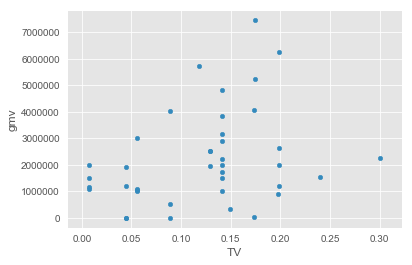

In [762]:
#### 1- GamingAccesory
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='TV', y='gmv');
plt.show()

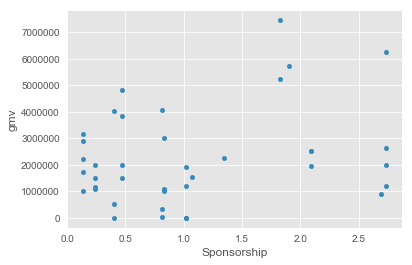

In [763]:
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='Sponsorship', y='gmv');
plt.show()

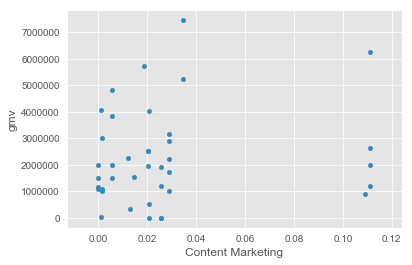

In [764]:
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='Content Marketing', y='gmv');
plt.show()

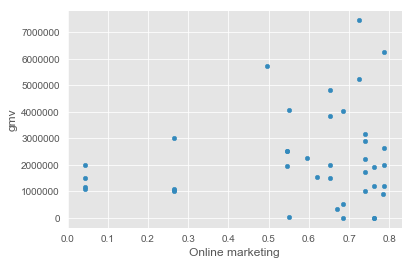

In [765]:
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='Online marketing', y='gmv');
plt.show()

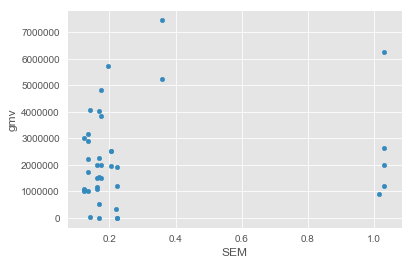

In [766]:
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='SEM', y='gmv');
plt.show()

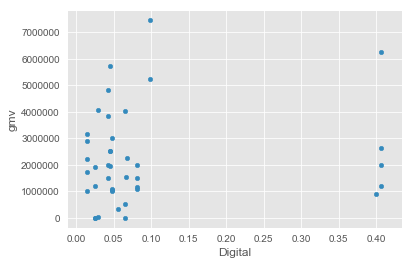

In [767]:
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='Digital', y='gmv');
plt.show()

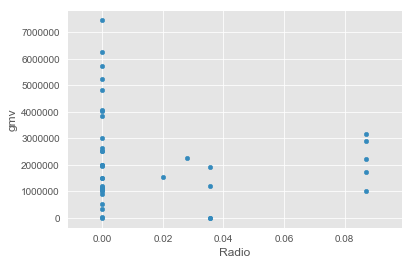

In [768]:
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='Radio', y='gmv');
plt.show()

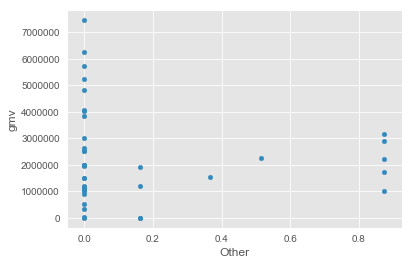

In [769]:
plt.style.use('ggplot')
GamingAccessoryWeekly.plot.scatter(x='Other', y='gmv');
plt.show()

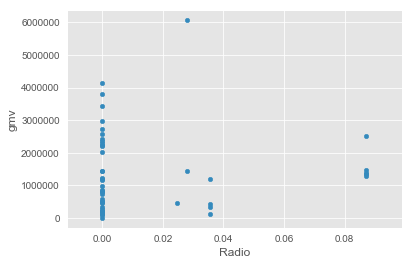

In [770]:
# 2. Homeaudioweekly
plt.style.use('ggplot')
HomeAudioWeekly.plot.scatter(x='Radio', y='gmv');
plt.show()

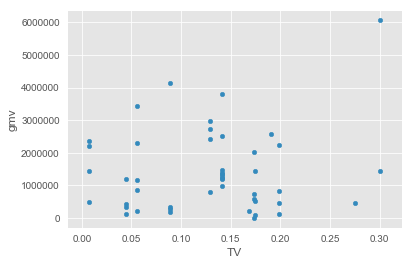

In [771]:
plt.style.use('ggplot')
HomeAudioWeekly.plot.scatter(x='TV', y='gmv');
plt.show()

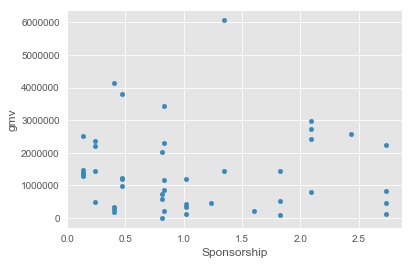

In [772]:
plt.style.use('ggplot')
HomeAudioWeekly.plot.scatter(x='Sponsorship', y='gmv');
plt.show()

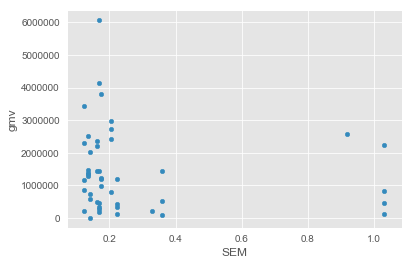

In [773]:
plt.style.use('ggplot')
HomeAudioWeekly.plot.scatter(x='SEM', y='gmv');
plt.show()

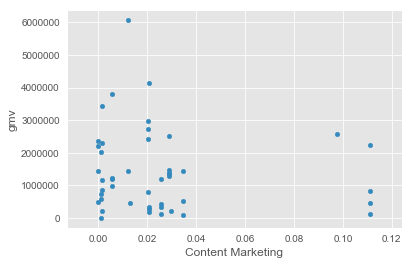

In [774]:
plt.style.use('ggplot')
HomeAudioWeekly.plot.scatter(x='Content Marketing', y='gmv');
plt.show()

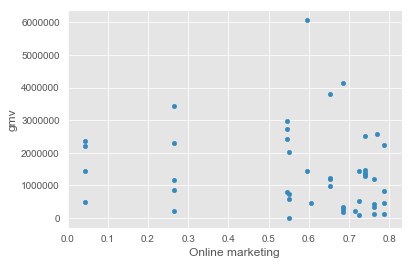

In [775]:
plt.style.use('ggplot')
HomeAudioWeekly.plot.scatter(x='Online marketing', y='gmv');
plt.show()

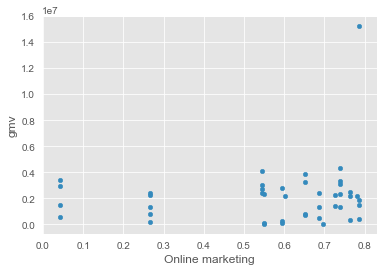

In [776]:
# 3.CameraAccessoryWeekly

plt.style.use('ggplot')
CameraAccessoryWeekly.plot.scatter(x='Online marketing', y='gmv');
plt.show()

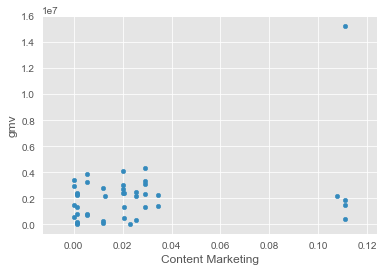

In [777]:
plt.style.use('ggplot')
CameraAccessoryWeekly.plot.scatter(x='Content Marketing', y='gmv');
plt.show()

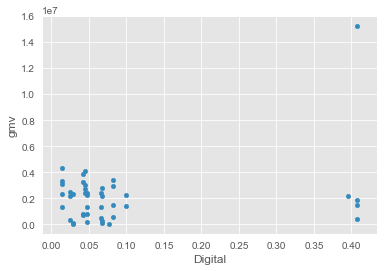

In [778]:
plt.style.use('ggplot')
CameraAccessoryWeekly.plot.scatter(x='Digital', y='gmv');
plt.show()

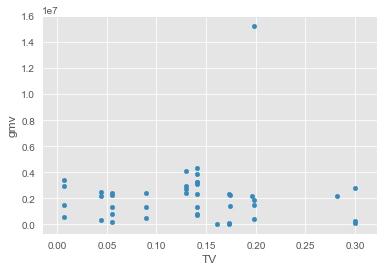

In [779]:
plt.style.use('ggplot')
CameraAccessoryWeekly.plot.scatter(x='TV', y='gmv');
plt.show()

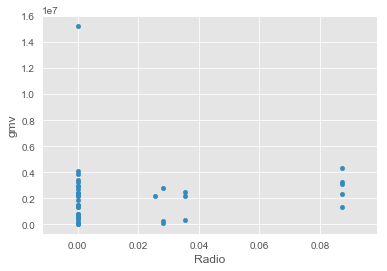

In [780]:
plt.style.use('ggplot')
CameraAccessoryWeekly.plot.scatter(x='Radio', y='gmv');
plt.show()